In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image,Video

MovieWriter imagemagick unavailable; using Pillow instead.


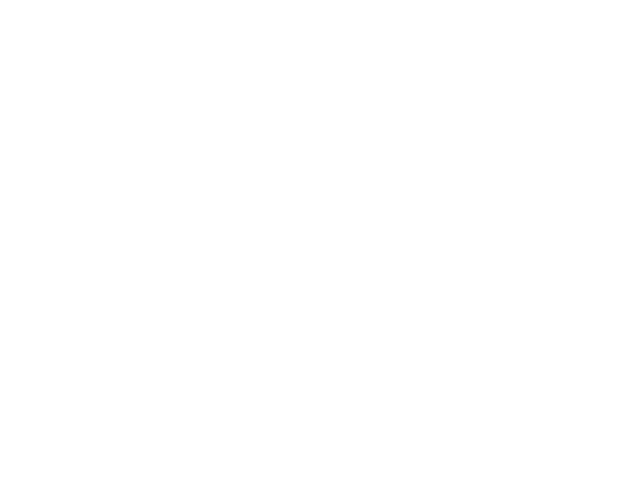

In [10]:
# --- Load CSV ---
df = pd.read_csv('drawings/drawing_data.csv')  # replace with your file path

# --- Prepare figure ---
fig, ax = plt.subplots()
ax.set_xlim(df['x'].min() - 10, df['x'].max() + 10)
ax.set_ylim(df['y'].min() - 10, df['y'].max() + 10)
ax.invert_yaxis()  # Optional: matches canvas coordinates
line, = ax.plot([], [], lw=2, color='blue')
ax.axis('off')  # Optional: hide axes

# --- Animation function ---
def update(frame):
    line.set_data(df['x'][:frame], df['y'][:frame])
    return (line,)   # note the comma

anim = FuncAnimation(fig, update, frames=len(df), interval=5, blit=True)
anim.save('spiral_animation.mp4', writer='ffmpeg', fps=60)
anim.save('spiral_animation.gif', writer='imagemagick', fps=60)

plt.close(fig)

# Video('spiral_animation.mp4')
Image('spiral_animation.gif')

In [ ]:
<!-- document.getElementById('exportBtn').addEventListener('click', () => {
  if (points.length === 0) {
    alert('No points recorded!');
    return;
  }

  let csv = 'timestamp_ms,x,y\n';
  points.forEach(p => {
    csv += `${p.t.toFixed(3)},${p.x.toFixed(2)},${p.y.toFixed(2)}\n`;
  });

  const blob = new Blob([csv], { type: 'text/csv' });
  const url = URL.createObjectURL(blob);
  const a = document.createElement('a');
  a.href = url;
  a.download = 'drawing_data.csv';
  a.click();
  URL.revokeObjectURL(url);
}); -->